In [ ]:
from data import PopStatsDataModule
import os
CURRENT_DIR = os.getcwd()
data = PopStatsDataModule(data_dir=os.path.join(CURRENT_DIR, "generator/data"),
                            task_id = 1,
                            exp_id = 14,
                            batch_size = 128)
data.prepare_data()
data.setup()

In [ ]:
data.train_dataloader().dataset[0][0].shape

In [ ]:
data.train_dataloader().dataset[0][1].shape

In [ ]:
data.train_dataloader().dataset[0][0]

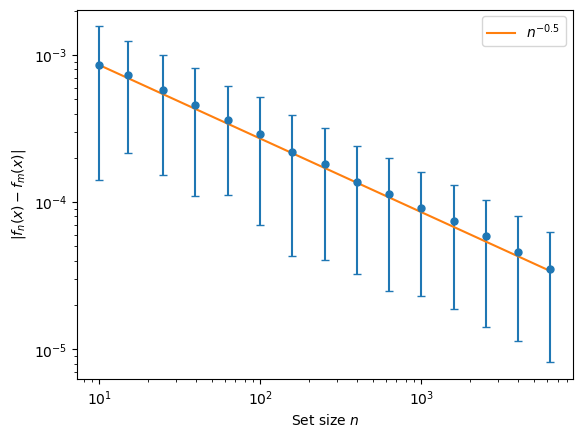

In [72]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

from model import DeepSet

d = 1
n_samples = 1000
M = int(1e8)  # reference set size, set to a large number as estimated cts limit
log_n_range = np.arange(1, 4, 0.2)

# fix a 2-d gaussian distribution
discrete_random_variable = torch.distributions.Categorical(torch.ones(5))
bernoulli = torch.distributions.Bernoulli(probs=0.5)

# fix a model with random weights
model = DeepSet(in_channels=d, output_channels=1, hidden_dim=128, normalized=True)
model.eval()

# compute estimated limit
X = bernoulli.sample((M,)).unsqueeze(0).unsqueeze(-1)
with torch.no_grad():
    limit = float(model(X).mean(dim=0))

# compute errors
n_range = np.power(10, log_n_range).astype(int)
errors_mean = np.zeros_like(n_range, dtype=float)
errors_std = np.zeros_like(n_range, dtype=float)
for i, n in enumerate(n_range):
    X = bernoulli.sample(
        (
            n_samples,
            n,
        )
    ).unsqueeze(-1)
    with torch.no_grad():
        y = model(X)
    error = torch.abs(y - limit)
    errors_mean[i] = float(error.mean(dim=0).squeeze())
    errors_std[i] = float(error.std(dim=0).squeeze())

# plot
plt.figure()
plt.errorbar(n_range, errors_mean, errors_std, fmt="o", capsize=3, markersize=5)
reference = n_range ** (-0.5) * n_range[0] ** (0.5) * errors_mean[0]
plt.plot(n_range, reference, label="$n^{-0.5}$")
plt.xlabel("Set size $n$")
plt.ylabel("$|f_n(x) - f_m(x)|$")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

In [48]:
errors_mean

array([0.00518459, 0.00036219, 0.00026541, 0.00021726, 0.0001826 ,
       0.00016956, 0.00015361, 0.00013533, 0.00012772, 0.00012187])

In [53]:
n_range ** (-2.0) - n_range[0] ** (-2.0) + errors_mean[0]

array([ 0.00518459, -0.03481442, -0.03481516, -0.0348153 , -0.03481535,
       -0.03481537, -0.03481538, -0.03481539, -0.03481539, -0.0348154 ])

In [43]:
n_range ** (-0.5) - n_range[0] ** (-0.5)

array([ 0.        , -0.41566958, -0.42488081, -0.42897137, -0.43141208,
       -0.43307853, -0.43430903, -0.43526558, -0.43603675, -0.4366756 ])

In [3]:
# fix a model with random weights
model = DeepSet(in_channels=2, output_channels=1, hidden_dim=128, normalized=True)
model.eval()
# use the output of a large dimension input as the truth
for i in range(20):
    X = multivariate_normal.sample((int(1e8),)).unsqueeze(0)
    with torch.no_grad():
        truth = float(model(X).mean(dim=0))
    print(truth)

-0.049350250512361526
-0.04934839531779289
-0.04935401678085327
-0.049351051449775696
-0.049339842051267624
-0.04935498535633087
-0.049348246306180954
-0.04935293644666672
-0.04934731125831604
-0.04934561252593994
-0.049351438879966736
-0.04935893416404724
-0.04934147000312805
-0.0493505597114563
-0.04933903366327286
-0.049345679581165314
-0.04935581982135773
-0.049349576234817505
-0.0493527352809906
-0.04934464395046234
